<a href="https://colab.research.google.com/github/Parisa-Foroutan/Tutorials/blob/main/ADMI821-%20Winter%202022/ADMI821_Session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Session 3:**

Find it on GitHub: https://github.com/Parisa-Foroutan/Tutorials/blob/main/ADMI821_Session3.ipynb

In this session supervised models such as Multiple Linear Regression, Logistic Regression, and Naive Bayes will be created and their prediction performance on a test set will be evaluated. You can find the datasets here: [nasa.csv ](https://drive.google.com/file/d/1JPUOwwIuFbyIWPNyMCWj78S-CIuqb75d/view?usp=sharing) , [daily demand order](https://docs.google.com/spreadsheets/d/1dTLJDzJu_pG_IEStgT5RRI1VSeGgjEKH/edit?usp=sharing&ouid=117858513827551292983&rtpof=true&sd=true), and [divorce descision](https://docs.google.com/spreadsheets/d/1cvpFwTfB3LnHK3MWVcYojF3doWc84dVE/edit?usp=sharing&ouid=117858513827551292983&rtpof=true&sd=true).

Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics, naive_bayes

## Multiple Linear Regression

Read the Data:

In [ ]:
Forecasting_data = pd.read_excel("/content/Daily Demand Order (Forecasting) dated.xlsx", sheet_name=0)
print(Forecasting_data.columns)
Forecasting_data.head(3)

Index(['Date', 'Week of the month', 'Day of the week', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')


,Date,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,2015-01-07,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,2015-01-08,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2015-01-09,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412


In [ ]:
# Check for any missing values
Forecasting_data.isna().sum()

Date                                         0
Week of the month                            0
Day of the week                              0
Non-urgent order                             0
Urgent order                                 0
Order type A                                 0
Order type B                                 0
Order type C                                 0
Fiscal sector orders                         0
Orders from the traffic controller sector    0
Banking orders (1)                           0
Banking orders (2)                           0
Banking orders (3)                           0
Target (Total orders)                        0
dtype: int64

Split the data into train and test subsets (Note: Time series data cannot be randomly subsampled):

In [ ]:
rate = 0.75
index = int(rate * len(Forecasting_data))

X_train = Forecasting_data.iloc[:index, 1:-1].values
y_train = Forecasting_data.loc[:index-1, "Target (Total orders)"].values

X_test = Forecasting_data.iloc[index:, 1:-1].values
y_test = Forecasting_data.loc[index:, "Target (Total orders)"].values
X_train.shape

(45, 12)

In [ ]:
X_test.shape

(15, 12)

Train linear regression model:

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:-1.7621459846850485e-12

Estiamted coefficients:[-9.93206053e-14 -9.29070189e-14  4.17648998e-14  3.52914070e-14
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.08788698e-15
 -4.57058978e-18 -3.14418630e-17 -6.23416249e-17 -4.93583039e-17]


Linear Regression Equation:   $ŷ = β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k}$

Test the prediction performance:

In [ ]:
y_pred = linear_reg.predict(X_test)
print(y_pred)

MSE = np.mean(np.square(y_pred - y_test))
print(f"\ncalculated MSE: {MSE}")
RMSE = np.sqrt(np.mean((y_pred - y_test)**2))
print(f"calculated RMSE: {RMSE}\n")

# using sklearn metrics
MSE_sk = metrics.mean_squared_error(y_test, y_pred)
print(f"MSE: {MSE_sk}")
MAE_sk = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {MAE_sk}")
MAPE_sk = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {MAPE_sk}")

[357.394 259.246 244.235 402.607 255.061 342.606 268.64  188.601 202.022
 213.509 316.849 286.412 303.447 304.95  331.9  ]

calculated MSE: 1.0827664971348422e-24
calculated RMSE: 1.0405606648027987e-12

MSE: 1.0827664971348422e-24
MAE: 8.678095279416691e-13
MAPE: 3.044450578385997e-15


Plot the predicted and actual values on the test set:

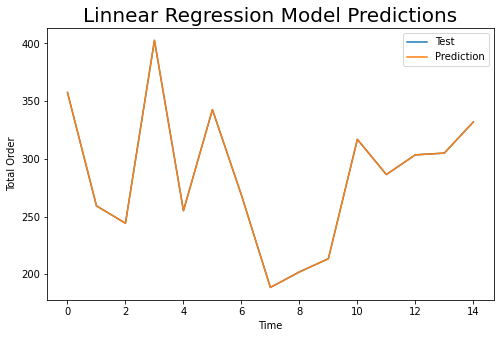

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(y_test, label= 'Test')
plt.plot(y_pred, label= 'Prediction')
plt.title('Linnear Regression Model Predictions', fontdict={'fontsize':20})
plt.xlabel('Time')
plt.ylabel('Total Order')
plt.legend()
plt.show()

## Logistic Regression for Classification

###Read the Data:

In [ ]:
# Divorce Dataset
# classification_data = pd.read_excel("/content/Divorce Decision (classification).xlsx", sheet_name=0)

# # Nasa Dataset
classification_data = pd.read_csv("/content/nasa.csv")

print(classification_data.columns)
classification_data.head(3)

Index(['Name', 'Eccentricity', 'Inclination', 'Neo Reference ID',
       'Absolute Magnitude', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Semi Major Axis', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')


,Name,Eccentricity,Inclination,Neo Reference ID,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3723955,0.351674,28.412996,3723955,21.3,479.225620,1071.581063,12784,7.890000e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,3,0.186935,5.457,1.107776,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
1,2446862,0.348248,4.237961,2446862,20.3,759.521423,1698.341531,12791,7.900000e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,0,0.043058,4.557,1.458824,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
2,3671135,0.563441,17.927751,3671135,19.6,1048.431420,2344.363926,12798,7.900000e+11,10.808844,38911.83825,24178.30305,0.392785,152.793274,1,0.272213,4.724,1.323532,178.971951,556.160556,0.577800,198.145969,2.069265,2458009.403,354.237368,0.647295,0


In [ ]:
# sample size
len(classification_data)

462

In [ ]:
# Check for any missing values
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          462 non-null    int64  
 1   Eccentricity                  462 non-null    float64
 2   Inclination                   462 non-null    float64
 3   Neo Reference ID              462 non-null    int64  
 4   Absolute Magnitude            462 non-null    float64
 5   Est Dia in Feet(min)          462 non-null    float64
 6   Est Dia in Feet(max)          462 non-null    float64
 7   Close Approach Date           462 non-null    int64  
 8   Epoch Date Close Approach     462 non-null    float64
 9   Relative Velocity km per sec  462 non-null    float64
 10  Relative Velocity km per hr   462 non-null    float64
 11  Miles per hour                462 non-null    float64
 12  Miss Dist.(Astronomical)      462 non-null    float64
 13  Miss 

(array([242.,   0., 220.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

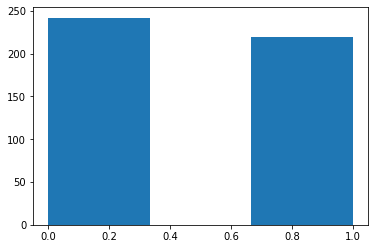

In [ ]:
# check the frequency of each class
plt.hist(classification_data["Hazardous"], bins=3)

###Randomly split the data into train and test subsets

In [ ]:
from sklearn.model_selection import train_test_split

# uncomment if using Divorce Dataset
# X = classification_data.iloc[:, :-1]
# y = classification_data["Class"]

# uncomment if using Nasa Dataset
X = classification_data.iloc[:, 1:-1]
y = classification_data["Hazardous"]

print(f"Shape of dataset: {classification_data.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(f"Shape of X_train: {X_train.shape}")

Shape of dataset: (462, 27)
Shape of X: (462, 25)
Shape of y: (462,)
Shape of X_train: (369, 25)


###Train logistic regression classifier:

Logit Equation:   $log odds = β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k}$

Logistic Regression Equation:
## $ p = \frac{1}{1+ e^{-(β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k})}}$

In [ ]:
# create linear regression object
logistic_reg = linear_model.LogisticRegression()
# fit the linear regression model to your training data
logistic_reg.fit(X_train, y_train)
print(f"intercept:{logistic_reg.intercept_}\n")
print(f"Estiamted coefficients:{logistic_reg.coef_}")

intercept:[-2.38321894e-25]

Estiamted coefficients:[[ 1.74131655e-25 -3.36198203e-24 -1.65011801e-18 -1.10516961e-23
   9.34690562e-22  2.09003163e-21 -1.95509079e-21 -9.37666467e-14
   3.01257290e-24  1.08452624e-20  6.73882432e-21 -2.18767999e-26
  -8.51007505e-24 -6.14249487e-24 -1.83238138e-25 -1.56348105e-24
  -1.85009257e-25 -2.27456419e-25 -4.47768757e-23 -4.76332074e-25
  -6.18422426e-23  1.06313559e-25 -5.86205868e-19 -4.77463161e-23
  -2.31034340e-25]]


###Test the prediction performance:

![](https://drive.google.com/uc?export=view&id=1MAzhijNiex7OpXI8ZEwNjJ6005jmnGwT) ![](https://drive.google.com/uc?export=view&id=1xtpS0KAt9j5gqRL4ZB1k3n5dHxJG7fVq)

In [ ]:
y_pred = logistic_reg.predict(X_test)
print(y_pred)
probalilities = logistic_reg.predict_proba(X_test)
print(f"Estiamted Probabilities:{probalilities}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Estiamted Probabilities:[[0.51989147 0.48010853]
 [0.52087438 0.47912562]
 [0.51944676 0.48055324]
 [0.52459388 0.47540612]
 [0.52482773 0.47517227]
 [0.53253786 0.46746214]
 [0.52141257 0.47858743]
 [0.52108498 0.47891502]
 [0.52833402 0.47166598]
 [0.51886158 0.48113842]
 [0.52412616 0.47587384]
 [0.52482773 0.47517227]
 [0.53253786 0.46746214]
 [0.52080418 0.47919582]
 [0.53207099 0.46792901]
 [0.52950218 0.47049782]
 [0.52078078 0.47921922]
 [0.52213789 0.47786211]
 [0.52926858 0.47073142]
 [0.53043648 0.46956352]
 [0.52599678 0.47400322]
 [0.51904885 0.48095115]
 [0.51893181 0.48106819]
 [0.52716555 0.47283445]
 [0.53417147 0.46582853]
 [0.52926858 0.47073142]
 [0.52120198 0.47879802]
 [0.52066377 0.47933623]
 [0.51888499 0.48111501]
 [0.53207099 0.46792901]
 [0.51944676 0.48055324]
 [0.5245938

The `roc_auc_score` function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions.

In [ ]:
# using sklearn metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}\n")

auc = metrics.roc_auc_score(y_test, probalilities[:, 1])
print(f"Area Under ROC curve (AUC): {auc}\n")

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

Accuracy: 0.45161290322580644

Area Under ROC curve (AUC): 0.31746031746031744



array([[42,  0],
       [51,  0]])

Find TP, TN, FP, and FN to calculate Sensitivity, Specificity, and Precision:

In [ ]:
tn, fp, fn, tp = confusion_mat.ravel()
tn

42

Plot the ROC curve:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


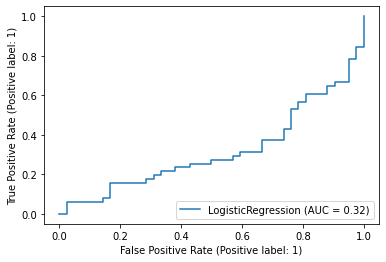

In [ ]:
metrics.plot_roc_curve(logistic_reg, X_test, y_test)

## Naive Bayes for Classification

We will use the same classification data as above. Refer to [sklearn documentation](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) for Naive Bayes.

###Train Naive Bayes classifier:

In [ ]:
# create Naive Bayes classifier
Naive_bayes = naive_bayes.GaussianNB()
# Naive_bayes = naive_bayes.MultinomialNB()

# fit the classifier to your training data
Naive_bayes.fit(X_train, y_train)

GaussianNB()

###Test the prediction performance:


In [ ]:
y_pred = Naive_bayes.predict(X_test)
print(y_pred)
probalilities = Naive_bayes.predict_proba(X_test)
print(f"Estiamted Probabilities:{probalilities}")

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0]
Estiamted Probabilities:[[0.64224237 0.35775763]
 [0.63088663 0.36911337]
 [0.64566387 0.35433613]
 [0.5734463  0.4265537 ]
 [0.57193115 0.42806885]
 [0.40710715 0.59289285]
 [0.6241649  0.3758351 ]
 [0.62830516 0.37169484]
 [0.50485965 0.49514035]
 [0.64948842 0.35051158]
 [0.58402035 0.41597965]
 [0.57294848 0.42705152]
 [0.40381752 0.59618248]
 [0.63173017 0.36826983]
 [0.41622018 0.58377982]
 [0.47970696 0.52029304]
 [0.63197661 0.36802339]
 [0.61454791 0.38545209]
 [0.48166118 0.51833882]
 [0.45838979 0.54161021]
 [0.55141621 0.44858379]
 [0.64777529 0.35222471]
 [0.64925693 0.35074307]
 [0.52852349 0.47147651]
 [0.36546716 0.63453284]
 [0.48248432 0.51751568]
 [0.62409879 0.37590121]
 [0.63337493 0.36662507]
 [0.652061   0.347939  ]
 [0.41909038 0.58090962]
 [0.64697826 0.35302174]
 [0.5769063

The `roc_auc_score` function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions.

In [ ]:
# using sklearn metrics
acc = (y_test == y_pred).mean()
print(f"Calculated Accuracy: {acc}\n")
acc1 = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc1}\n")

auc = metrics.roc_auc_score(y_test, probalilities[:, 1])
print(f"Area Under ROC curve (AUC): {auc}\n")

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

Calculated Accuracy: 0.6129032258064516

Accuracy: 0.6129032258064516

Area Under ROC curve (AUC): 0.6909430438842203



array([[37,  5],
       [31, 20]])

Find TP, TN, FP, and FN to calculate Sensitivity, Specificity, and Precision:

In [ ]:
tn, fp, fn, tp = confusion_mat.ravel()

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print(f"sensitivity: {sensitivity}")
print(f"specificity: {specificity}")

sensitivity: 0.39215686274509803
specificity: 0.8809523809523809


Plot the ROC curve:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


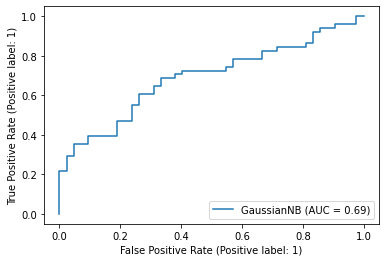

In [ ]:
metrics.plot_roc_curve(Naive_bayes, X_test, y_test)

Which Classification model performs better on Nasa's comet classification task?